In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()

In [5]:
tips = sns.load_dataset("tips")

In [6]:
tips.shape

(244, 7)

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.dropna().describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
tips.groupby("smoker")

In [10]:
tips.groupby("smoker")["tip"]

In [11]:
tips.groupby("smoker")["tip"].median()

smoker
Yes    3.00
No     2.74
Name: tip, dtype: float64

In [12]:
tips.groupby("smoker")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0


In [14]:
tips.groupby("smoker")["tip"].describe().unstack()

       smoker
count  Yes        93.000000
       No        151.000000
mean   Yes         3.008710
       No          2.991854
std    Yes         1.401468
       No          1.377190
min    Yes         1.000000
       No          1.000000
25%    Yes         2.000000
       No          2.000000
50%    Yes         3.000000
       No          2.740000
75%    Yes         3.680000
       No          3.505000
max    Yes        10.000000
       No          9.000000
dtype: float64

In [15]:
tips.groupby("day").aggregate([np.mean, np.median])

total_bill              tip             size       
           mean median      mean median      mean median
day                                                     
Thur  17.682742  16.20  2.771452  2.305  2.451613      2
Fri   17.151579  15.38  2.734737  3.000  2.105263      2
Sat   20.441379  18.24  2.993103  2.750  2.517241      2
Sun   21.410000  19.63  3.255132  3.150  2.842105      2

In [16]:
tips.groupby("smoker").aggregate({
    "tip": np.min,
    "total_bill": np.max
})

,tip,total_bill
smoker,,
Yes,1.0,50.81
No,1.0,48.33


In [17]:
tips["tip"].std()

1.3836381890011822

In [18]:
tips.groupby("smoker").filter(
    lambda x: x["tip"].std() > 1.1
)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [19]:
tips.groupby("smoker").transform(
    lambda x: x - x.mean()
)

,total_bill,tip,size
0,-2.198278,-1.981854,-0.668874
1,-8.848278,-1.331854,0.331126
2,1.821722,0.508146,0.331126
3,4.491722,0.318146,-0.668874
4,5.401722,0.618146,1.331126
5,6.101722,1.718146,1.331126
6,-10.418278,-0.991854,-0.668874
7,7.691722,0.128146,1.331126
8,-4.148278,-1.031854,-0.668874
9,-4.408278,0.238146,-0.668874


In [20]:
def normalize_data(item):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~", item)

In [21]:
tips.groupby("smoker").apply(normalize_data)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~      total_bill   tip     sex smoker   day    time  size
56        38.01  3.00    Male    Yes   Sat  Dinner     4
58        11.24  1.76    Male    Yes   Sat  Dinner     2
60        20.29  3.21    Male    Yes   Sat  Dinner     2
61        13.81  2.00    Male    Yes   Sat  Dinner     2
62        11.02  1.98    Male    Yes   Sat  Dinner     2
63        18.29  3.76    Male    Yes   Sat  Dinner     4
67         3.07  1.00  Female    Yes   Sat  Dinner     1
69        15.01  2.09    Male    Yes   Sat  Dinner     2
72        26.86  3.14  Female    Yes   Sat  Dinner     2
73        25.28  5.00  Female    Yes   Sat  Dinner     2
76        17.92  3.08    Male    Yes   Sat  Dinner     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
83        32.68  5.00    Male    Yes  Thur   Lunch     2
90        28.97  3.00    Male    Yes   Fri  Dinner     2
92         5.75  1.00  Female    Yes   Fri  Dinner     2
93        16.32  4.30  Female    Yes   Fri  Dinner     

""


In [22]:
def normalize_data(item):
    # has no real world meaning, just for example
    # item["total_bill"] = item["total_bill"] / item["tip"]
    item["total_bill"] /= item["tip"]
    return item

In [23]:
tips.groupby("day").apply(normalize_data)

,total_bill,tip,sex,smoker,day,time,size
0,16.821782,1.01,Female,No,Sun,Dinner,2
1,6.228916,1.66,Male,No,Sun,Dinner,3
2,6.002857,3.50,Male,No,Sun,Dinner,3
3,7.154079,3.31,Male,No,Sun,Dinner,2
4,6.811634,3.61,Female,No,Sun,Dinner,4
5,5.369427,4.71,Male,No,Sun,Dinner,4
6,4.385000,2.00,Male,No,Sun,Dinner,2
7,8.615385,3.12,Male,No,Sun,Dinner,4
8,7.673469,1.96,Male,No,Sun,Dinner,2
9,4.575851,3.23,Male,No,Sun,Dinner,2


In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [27]:
tips.pivot_table?

Signature:
tips.pivot_table(
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
)
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame.

Parameters
----------
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table column

In [30]:
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [29]:
tips.groupby(["sex", "day"]).mean()

total_bill       tip      size
sex    day                                 
Male   Thur   18.714667  2.980333  2.433333
       Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
Female Thur   16.715312  2.575625  2.468750
       Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444

In [26]:
tips.pivot_table(
    "tip", index="sex", columns="day"
)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.980333,2.693000,3.083898,3.220345
Female,2.575625,2.781111,2.801786,3.367222


In [31]:
tips.pivot_table(
    "tip", ["sex", "smoker"], columns="day"
)

day              Thur       Fri       Sat       Sun
sex    smoker                                      
Male   Yes     3.0580  2.741250  2.879259  3.521333
       No      2.9415  2.500000  3.256563  3.115349
Female Yes     2.9900  2.682857  2.868667  3.500000
       No      2.4596  3.125000  2.724615  3.329286

In [32]:
tips["size"].min()

1

In [33]:
tips["size"].max()

6

In [34]:
cus_size = pd.cut(tips["size"], 2)

In [35]:
cus_size

0      (0.995, 3.5]
1      (0.995, 3.5]
2      (0.995, 3.5]
3      (0.995, 3.5]
4        (3.5, 6.0]
5        (3.5, 6.0]
6      (0.995, 3.5]
7        (3.5, 6.0]
8      (0.995, 3.5]
9      (0.995, 3.5]
10     (0.995, 3.5]
11       (3.5, 6.0]
12     (0.995, 3.5]
13       (3.5, 6.0]
14     (0.995, 3.5]
15     (0.995, 3.5]
16     (0.995, 3.5]
17     (0.995, 3.5]
18     (0.995, 3.5]
19     (0.995, 3.5]
20     (0.995, 3.5]
21     (0.995, 3.5]
22     (0.995, 3.5]
23       (3.5, 6.0]
24     (0.995, 3.5]
25       (3.5, 6.0]
26     (0.995, 3.5]
27     (0.995, 3.5]
28     (0.995, 3.5]
29     (0.995, 3.5]
           ...     
214    (0.995, 3.5]
215    (0.995, 3.5]
216      (3.5, 6.0]
217    (0.995, 3.5]
218    (0.995, 3.5]
219      (3.5, 6.0]
220    (0.995, 3.5]
221    (0.995, 3.5]
222    (0.995, 3.5]
223    (0.995, 3.5]
224    (0.995, 3.5]
225    (0.995, 3.5]
226    (0.995, 3.5]
227      (3.5, 6.0]
228    (0.995, 3.5]
229    (0.995, 3.5]
230      (3.5, 6.0]
231    (0.995, 3.5]
232    (0.995, 3.5]


In [36]:
tips.pivot_table(
    "tip", ["sex", "smoker"], [cus_size, "day"]
)

size          (0.995, 3.5]                               (3.5, 6.0]        \
day                   Thur       Fri       Sat       Sun       Thur   Fri   
sex    smoker                                                               
Male   Yes        2.953333  2.457143  2.753333  3.386667   4.000000  4.73   
       No         2.537059  2.500000  2.810000  2.693793   5.233333   NaN   
Female Yes        2.655000  2.682857  2.852857  3.500000   5.000000   NaN   
       No         2.104762  3.125000  2.747500  2.656667   4.322500   NaN   

size                               
day                 Sat       Sun  
sex    smoker                      
Male   Yes     3.320000  4.060000  
       No      5.191667  3.988571  
Female Yes     3.090000       NaN  
       No      2.450000  4.540000

In [37]:
tips.pivot_table(
    "tip", ["sex", "smoker"], "day",
    aggfunc={"tip": np.median}
)

day             Thur    Fri   Sat  Sun
sex    smoker                         
Male   Yes     2.780  2.600  3.00  3.5
       No      2.405  2.500  2.86  3.0
Female Yes     2.500  2.500  2.50  3.5
       No      2.000  3.125  2.75  3.5

In [42]:
tips.pivot_table(
    ["tip", "total_bill"], ["sex", "smoker"], "day",
    aggfunc={"tip": np.median, "total_bill": np.sum},
    margins=True
)

tip                          total_bill                   \
day             Thur    Fri   Sat   Sun   All       Thur     Fri      Sat   
sex    smoker                                                               
Male   Yes     2.780  2.600  3.00  3.50  3.00     191.71  163.62   589.62   
       No      2.405  2.500  2.86  3.00  2.74     369.73   34.95   637.73   
Female Yes     2.500  2.500  2.50  3.50  2.88     134.53   88.58   304.00   
       No      2.000  3.125  2.75  3.50  2.68     400.36   38.73   247.05   
All            2.305  3.000  2.75  3.15  2.90    1096.33  325.88  1778.40   

                                 
day                Sun      All  
sex    smoker                    
Male   Yes      392.12  1337.07  
       No       877.34  1919.75  
Female Yes       66.16   593.27  
       No       291.54   977.68  
All            1627.16  4827.77

In [43]:
tips.pivot_table("tip", "day", columns="sex")

sex,Male,Female
day,,
Thur,2.980333,2.575625
Fri,2.693000,2.781111
Sat,3.083898,2.801786
Sun,3.220345,3.367222


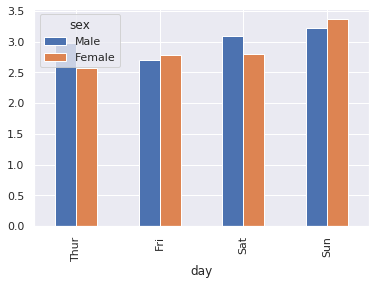

In [45]:
tips.pivot_table("tip", "day", columns="sex").plot(kind="bar")